In [207]:
import nltk
import pandas as pd
#nltk.download()

In [208]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
import re

In [209]:
data= pd.read_csv("Emotion_final.csv")

data


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [210]:
data["Text"] = data["Text"].str.lower()
data["Emotion"]=data["Emotion"].str.lower()

data

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,melissa stared at her friend in dism,fear
21455,successive state elections have seen the gover...,fear
21456,vincent was irritated but not dismay,fear
21457,kendall-hume turned back to face the dismayed ...,fear


In [211]:

data['Text'] = data['Text'].str.replace(r'[^\w\s,]', '')
data['Text'] = data['Text'].apply(lambda x: x.replace(',', ''))

data["Text"]

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 melissa stared at her friend in dism
21455    successive state elections have seen the gover...
21456                 vincent was irritated but not dismay
21457    kendall-hume turned back to face the dismayed ...
21458                       i am dismayed  but not surpris
Name: Text, Length: 21459, dtype: object

In [212]:
nbre_emotion = data['Emotion'].value_counts()

# Afficher le décompte des émotions
print(nbre_emotion)



Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64


In [213]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [214]:
stopwords_list = set(stopwords.words('english'))  # Remplacez 'fr' par le code de la langue souhaitée

# Afficher les premiers mots de la liste de stopwords
#print(stopwords_list[:10])

nv_mots_stops = ['feel', 'feeling','feelings', 'like','im','really', 'today','didnt','go', 'know', 'get', 'want', 'would', 'time', 'little', 'ive', 'still', 'even', 'one',  'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could']
stopwords_list.update(nv_mots_stops)

In [215]:
data['Stopwords'] = data['Text'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() in stopwords_list))
data

,Text,Emotion,Stopwords
0,i didnt feel humiliated,sadness,i didnt feel
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so to so just from being...
2,im grabbing a minute to post i feel greedy wrong,anger,im a to i feel
3,i am ever feeling nostalgic about the fireplac...,love,i am feeling about the i will know that it is ...
4,i am feeling grouchy,anger,i am feeling
...,...,...,...
21454,melissa stared at her friend in dism,fear,at her in
21455,successive state elections have seen the gover...,fear,have the by a
21456,vincent was irritated but not dismay,fear,was but not
21457,kendall-hume turned back to face the dismayed ...,fear,back to the


In [216]:
texte_concatene = ' '.join(data['Text'].tolist())

# Calculer le nombre total de stopwords
total_stopwords = len([word for word in texte_concatene.split() if word.lower() in stopwords_list])

# Afficher le nombre total de stopwords
print(f"Nombre total de stopwords : {total_stopwords}")

texte_concatene = ' '.join(data['Text'].tolist())

# Calculer le nombre total de mots
total_mots = len(texte_concatene.split())

# Afficher le nombre total de mots
print(f"Nombre total de mots : {total_mots}")


Nombre total de stopwords : 255058
Nombre total de mots : 408435


In [217]:
from collections import Counter

emotion_words = {}

for emotion in data['Emotion'].unique():
    texts = data[data['Emotion'] == emotion]['Text'].tolist()
    word_counts = Counter()
    for text in texts:
        words = text.lower().split()
        filtered_words = [word for word in words if word not in stopwords_list]
        word_counts.update(filtered_words)
    common_words = word_counts.most_common(30)
    print(f"emotion: {emotion}")
    print(common_words)
    print()


emotion: sadness
[('life', 228), ('pretty', 146), ('right', 143), ('always', 141), ('love', 138), ('felt', 136), ('cant', 132), ('sad', 130), ('alone', 127), ('bad', 126), ('say', 125), ('made', 124), ('depressed', 123), ('see', 122), ('need', 121), ('work', 121), ('good', 121), ('never', 111), ('days', 110), ('miserable', 108), ('though', 104), ('kind', 101), ('lost', 101), ('also', 100), ('feels', 99), ('home', 99), ('last', 99), ('left', 99), ('many', 98), ('help', 98)]

emotion: anger
[('angry', 116), ('offended', 92), ('resentful', 87), ('cold', 86), ('irritable', 84), ('cant', 83), ('bothered', 81), ('greedy', 77), ('life', 74), ('mad', 74), ('insulted', 73), ('irritated', 72), ('need', 71), ('pissed', 71), ('violent', 70), ('annoyed', 70), ('hated', 70), ('say', 69), ('dissatisfied', 68), ('fucked', 68), ('rude', 68), ('right', 67), ('bitchy', 67), ('cranky', 67), ('frustrated', 66), ('rushed', 66), ('dangerous', 66), ('stressed', 66), ('selfish', 65), ('bitter', 64)]

emotion: 

In [218]:
from collections import Counter

emotion_words = {}

for emotion in data['Emotion'].unique():
    texts = data[data['Emotion'] == emotion]['Text'].tolist()
    word_counts = Counter()
    for text in texts:
        words = text.lower().split()
        filtered_words = [word for word in words if word not in stopwords_list]
        word_counts.update(filtered_words)
    common_words = word_counts.most_common(30)

    # Supprimer les mots en commun avec les émotions précédentes
    if emotion_words:
        prev_emotions_words = set()
        for prev_emotion in emotion_words:
            prev_emotions_words.update(emotion_words[prev_emotion])
        common_words = [(word, count) for word, count in common_words if word not in prev_emotions_words]

    emotion_words[emotion] = [word for word, count in common_words]

    print(f"Emotion: {emotion}")
    print("Modified common words:", emotion_words[emotion])
    print()



Emotion: sadness
Modified common words: ['life', 'pretty', 'right', 'always', 'love', 'felt', 'cant', 'sad', 'alone', 'bad', 'say', 'made', 'depressed', 'see', 'need', 'work', 'good', 'never', 'days', 'miserable', 'though', 'kind', 'lost', 'also', 'feels', 'home', 'last', 'left', 'many', 'help']

Emotion: anger
Modified common words: ['angry', 'offended', 'resentful', 'cold', 'irritable', 'bothered', 'greedy', 'mad', 'insulted', 'irritated', 'pissed', 'violent', 'annoyed', 'hated', 'dissatisfied', 'fucked', 'rude', 'bitchy', 'cranky', 'frustrated', 'rushed', 'dangerous', 'stressed', 'selfish', 'bitter']

Emotion: love
Modified common words: ['sweet', 'loving', 'caring', 'passionate', 'sympathetic', 'liked', 'hot', 'tender', 'lovely', 'longing', 'loved', 'accepted', 'nostalgic', 'gentle', 'horny', 'naughty', 'romantic', 'blessed', 'supporting', 'loyal', 'supportive', 'beloved', 'fond', 'generous', 'delicate', 'someone']

Emotion: surprise
Modified common words: ['amazed', 'impressed', '

In [ ]:



# Identifiez les 30 mots les plus courants pour chaque sentiment en dehors des stopwords
top_words_by_emotion = {}
for emotion, freq_dist in emotion_word_freqs.items():
    top_words = [word for word, freq in freq_dist.most_common(30)]
    top_words_by_emotion[emotion] = top_words



similarity_matrix = pd.DataFrame(0, index=data['emotion'].unique(), columns=data['emotion'].unique())
for emotion1 in data['emotion'].unique():
    for emotion2 in data['emotion'].unique():
        common_words = set(top_words_by_emotion[emotion1]).intersection(top_words_by_emotion[emotion2])
        similarity_matrix.loc[emotion1, emotion2] = len(common_words)

# Afficher la matrice de similarité sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu")
plt.title("Matrice de similarité entre les sentiments")
plt.show()

In [219]:
# import numpy as np

# emotions = data['Emotion'].unique()
# proximity_matrix = np.zeros((len(emotions), len(emotions)))


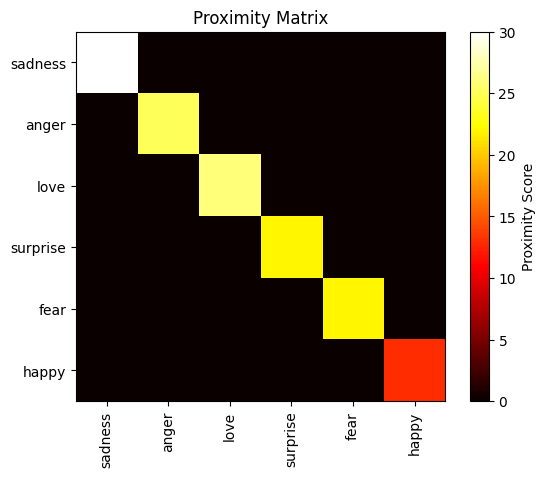

In [220]:
import numpy as np
import matplotlib.pyplot as plt

# Création de la matrice de proximité

emotions = data['Emotion'].unique()

proximity_matrix = np.zeros((len(emotions), len(emotions)))

for i, emotion1 in enumerate(emotions):
    for j, emotion2 in enumerate(emotions):
        common_words = set(emotion_words[emotion1]) & set(emotion_words[emotion2])
        proximity_score = len(common_words)
        proximity_matrix[i, j] = proximity_score

# Création de la matrice de chaleur
plt.imshow(proximity_matrix, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(emotions)), emotions, rotation='vertical')
plt.yticks(np.arange(len(emotions)), emotions)
plt.colorbar(label='Proximity Score')
plt.title('Proximity Matrix')
plt.show()


In [221]:
# import numpy as np
# import nltk
# from nltk.metrics.distance import edit_distance
# import matplotlib.pyplot as plt
# import seaborn as sns

# emotions = data['Emotion'].unique()
# proximity_matrix = np.zeros((len(emotions), len(emotions)))

# for i, emotion1 in enumerate(emotions):
#     for j, emotion2 in enumerate(emotions):
#         # Mots uniques pour chaque émotion
#         words1 = ' '.join(emotion_words[emotion1])
#         words2 = ' '.join(emotion_words[emotion2])

#         # Calcul de la distance de modification entre les ensembles de mots
#         distance = nltk.edit_distance(words1, words2)

#         # Assigner la distance de modification à la matrice de proximité
#         proximity_matrix[i, j] = distance

# sns.heatmap(proximity_matrix, cmap='coolwarm')
# plt.xticks(np.arange(len(emotions)), emotions, rotation='vertical')
# plt.yticks(np.arange(len(emotions)), emotions)
# plt.colorbar(label='Edit Distance')
# plt.title('Proximity Matrix')
# plt.show()




In [222]:

import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/apprenant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [223]:
def preprocess_text(text):
    # Supprimer la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Supprimer les émojis
    text = emoji.demojize(text)
    text = text.replace(":", "")
    
    # Tokenisation
    tokens = word_tokenize(text)
    
    # Supprimer les stopwords
    stopwords_list 
    tokens = [word for word in tokens if word.lower() not in stopwords_list]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens


In [224]:
data['Processed_Text'] = data['Text'].apply(preprocess_text)

data


,Text,Emotion,Stopwords,Processed_Text
0,i didnt feel humiliated,sadness,i didnt feel,[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so to so just from being...,"[hopeless, damned, hopeful, around, someone, c..."
2,im grabbing a minute to post i feel greedy wrong,anger,im a to i feel,"[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am feeling about the i will know that it is ...,"[ever, nostalgic, fireplace, property]"
4,i am feeling grouchy,anger,i am feeling,[grouchy]
...,...,...,...,...
21454,melissa stared at her friend in dism,fear,at her in,"[melissa, stared, friend, dism]"
21455,successive state elections have seen the gover...,fear,have the by a,"[successive, state, election, seen, governing,..."
21456,vincent was irritated but not dismay,fear,was but not,"[vincent, irritated, dismay]"
21457,kendall-hume turned back to face the dismayed ...,fear,back to the,"[kendallhume, turned, face, dismayed, coup]"


In [225]:
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    # Supprimer la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Supprimer les émojis
    text = emoji.demojize(text)
    text = text.replace(":", "")
    
    # Tokenisation
    tokens = word_tokenize(text)
    
    # Supprimer les stopwords

    tokens = [word for word in tokens if word.lower() not in stopwords_list]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoindre les tokens pour former le texte prétraité
    processed_text = " ".join(tokens)
    
    return processed_text

# Exemple d'utilisation de la fonction sur une colonne 'Text' d'un dataframe 'data'
data['Processed_Text'] = data['Text'].apply(preprocess_text)

# Utiliser le modèle TF-IDF pour vectoriser le texte prétraité
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Processed_Text'])

# Maintenant, tfidf_matrix contient les représentations vectorielles TF-IDF des textes prétraités.


In [226]:
data['Process_Text'] = data['Text'].apply(preprocess_text)
data
tfidf_matrix

<21459x17136 sparse matrix of type '<class 'numpy.float64'>'
	with 148460 stored elements in Compressed Sparse Row format>

In [227]:
def calculate_tfidf_matrix(text):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])
    return tfidf_matrix

# Appliquer la fonction à chaque texte de la colonne 'Processed_Text'
data['TFIDF_Matrix'] = data['Text'].apply(calculate_tfidf_matrix)

In [228]:
data

,Text,Emotion,Stopwords,Processed_Text,Process_Text,TFIDF_Matrix
0,i didnt feel humiliated,sadness,i didnt feel,humiliated,humiliated,"(0, 2)\t0.5773502691896258\n (0, 1)\t0.5773..."
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so to so just from being...,hopeless damned hopeful around someone care awake,hopeless damned hopeful around someone care awake,"(0, 2)\t0.20412414523193154\n (0, 12)\t0.20..."
2,im grabbing a minute to post i feel greedy wrong,anger,im a to i feel,grabbing minute post greedy wrong,grabbing minute post greedy wrong,"(0, 7)\t0.35355339059327373\n (0, 2)\t0.353..."
3,i am ever feeling nostalgic about the fireplac...,love,i am feeling about the i will know that it is ...,ever nostalgic fireplace property,ever nostalgic fireplace property,"(0, 10)\t0.23570226039551587\n (0, 9)\t0.23..."
4,i am feeling grouchy,anger,i am feeling,grouchy,grouchy,"(0, 2)\t0.5773502691896258\n (0, 1)\t0.5773..."
...,...,...,...,...,...,...
21454,melissa stared at her friend in dism,fear,at her in,melissa stared friend dism,melissa stared friend dism,"(0, 1)\t0.3779644730092272\n (0, 4)\t0.3779..."
21455,successive state elections have seen the gover...,fear,have the by a,successive state election seen governing party...,successive state election seen governing party...,"(0, 3)\t0.2886751345948129\n (0, 1)\t0.2886..."
21456,vincent was irritated but not dismay,fear,was but not,vincent irritated dismay,vincent irritated dismay,"(0, 1)\t0.4082482904638631\n (0, 3)\t0.4082..."
21457,kendall-hume turned back to face the dismayed ...,fear,back to the,kendallhume turned face dismayed coup,kendallhume turned face dismayed coup,"(0, 1)\t0.3333333333333333\n (0, 2)\t0.3333..."


In [229]:
data.describe

<bound method NDFrame.describe of                                                     Text  Emotion  \
0                                i didnt feel humiliated  sadness   
1      i can go from feeling so hopeless to so damned...  sadness   
2       im grabbing a minute to post i feel greedy wrong    anger   
3      i am ever feeling nostalgic about the fireplac...     love   
4                                   i am feeling grouchy    anger   
...                                                  ...      ...   
21454               melissa stared at her friend in dism     fear   
21455  successive state elections have seen the gover...     fear   
21456               vincent was irritated but not dismay     fear   
21457  kendall-hume turned back to face the dismayed ...     fear   
21458                     i am dismayed  but not surpris     fear   

                                               Stopwords  \
0                                           i didnt feel   
1      i can go f

In [230]:
data.dtypes

Text              object
Emotion           object
Stopwords         object
Processed_Text    object
Process_Text      object
TFIDF_Matrix      object
dtype: object

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('wordnet')

stops = list(stopwords_list)

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    return ' '.join(lemmatizer.lemmatize(term) for term in word_tokenize(text.lower()) if term not in stops)

X = data['Text'].apply(preprocess_text)
y = data['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words=stops)),
    ('clf', LogisticRegression(C=20.52695741523762, max_iter=186, solver='saga', penalty='l1')),
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, preds).round(2))

[nltk_data] Downloading package punkt to /home/apprenant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy:  0.9


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [232]:
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk


X = data['Processed_Text']
y = data['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du pipeline du modèle
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stops)),
    ('clf', LogisticRegression(C=20.52695741523762, max_iter=186, solver='saga', penalty='l1')),
])

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédiction sur les données de test
preds = pipeline.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy.round(2))

Accuracy: 0.9


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [233]:
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# # Appliquer t-SNE sur la matrice TF-IDF
# tsne = TSNE(n_components=2, random_state=42, init='random')
# tsne_results = tsne.fit_transform(tfidf_matrix)

# # Obtenir les étiquettes de classe si disponibles
# labels = data['Emotion'].values

# # Créer un nuage de points avec des couleurs en fonction des étiquettes de classe
# plt.figure(figsize=(10, 8))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
# plt.colorbar()

# # Ajouter des annotations pour les points si nécessaire
# for i, label in enumerate(labels):
#     plt.annotate(label, (tsne_results[i, 0], tsne_results[i, 1]))

# # Afficher le graphe
# plt.show()


In [236]:
from elasticsearch import Elasticsearch

# Se connecter à Elasticsearch
es = Elasticsearch('http://localhost:9200')

# Définir le mapping pour l'index "notes"
mapping = {
    "mappings": {
        "properties": {
            "patient_lastname": {
                "type": "keyword"
            },
            "patient_firstname": {
                "type": "keyword"
            },
            "text": {
                "type": "text",
                "analyzer": "standard"
            },
            "date": {
                "type": "date"
            },
            "patient_left": {
                "type": "boolean"
            },
            "emotion": {
                "type": "keyword"
            },
            "confidence": {
                "type": "float"
            }
        }
    }
}

# Créer l'index "notes" avec le mapping
es.indices.create(index="notes", body=mapping)


/tmp/ipykernel_3716/2191135759.py:37: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  es.indices.create(index="notes", body=mapping)
/tmp/ipykernel_3716/2191135759.py:37: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.indices.create(index="notes", body=mapping)


ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'notes'})

In [239]:
from faker import Faker

# Générer des données avec la librairie Faker
fake = Faker()

# Nombre de documents à générer
num_documents = 100

# Alimenter l'index "notes" avec des données Faker
for _ in range(num_documents):
    note = {
        "patient_lastname": fake.last_name(),
        "patient_firstname": fake.first_name(),
        "text": fake.paragraph(),
        "date": fake.date(),
        "patient_left": fake.boolean(),
        "emotion": fake.word(),
        "confidence": fake.pyfloat(left_digits=2, right_digits=2, positive=True)
    }
    es.index(index="notes", body=note)



/tmp/ipykernel_3716/240768640.py:20: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use the 'document' parameter. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  es.index(index="notes", body=note)
/tmp/ipykernel_3716/240768640.py:20: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.index(index="notes", body=note)


In [1]:
from elasticsearch import Elasticsearch
from faker import Faker
import csv

# Connexion à Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200,'scheme': 'http'}])

# Instanciation de Faker
fake = Faker()

# Fake patient

patient_list= []
# Generate a tuple of (first_name, last_name)

for i in range(50):
    patient_list.append( (fake.first_name(), fake.last_name()) )

# Chemin vers le fichier CSV
csv_file = 'analyse/data/Emotion_final.csv'

# Nom de l'index Elasticsearch
index_name = 'notes'
truc = 1
# Lecture du fichier CSV et indexation des données
with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Génération des valeurs Faker pour les champs nom et prenom
        row['nom'] = fake.last_name()
        row['prenom'] = fake.first_name()
        if truc ==1:
            print(row)
            truc +=1

        # # Indexation des données dans Elasticsearch
        # es.index(index=index_name, body=row)

print("Indexation terminée.")

FileNotFoundError: [Errno 2] No such file or directory: 'analyse/data/Emotion_final.csv'

In [244]:
search_query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": "Norris"}},
                {"match": {"patient_firstname": "Lauren"}}
            ]
        }
    }
}

result = es.search(index="notes", body=search_query)


/tmp/ipykernel_3716/3765524348.py:12: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="notes", body=search_query)
/tmp/ipykernel_3716/3765524348.py:12: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  result = es.search(index="notes", body=search_query)


In [245]:
import pandas as pd

# Récupérer les résultats de la recherche
hits = result["hits"]["hits"]

# Créer une liste pour stocker les sentiments
sentiments = []

# Parcourir les résultats et extraire les sentiments
for hit in hits:
    sentiment = hit["_source"]["emotion"]
    sentiments.append(sentiment)

# Créer un DataFrame à partir de la liste de sentiments
df = pd.DataFrame(sentiments, columns=["Sentiment"])

# Afficher la répartition des sentiments
sentiment_counts = df["Sentiment"].value_counts()
print(sentiment_counts)


Sentiment
fill    1
Name: count, dtype: int64


In [246]:
search_query = {
    "query": {
        "match": {"emotion": "happy"}
    }
}

result = es.search(index="notes", body=search_query, size=num_documents)


/tmp/ipykernel_3716/3657477072.py:7: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="notes", body=search_query, size=num_documents)
/tmp/ipykernel_3716/3657477072.py:7: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  result = es.search(index="notes", body=search_query, size=num_documents)


In [247]:
happy_documents = result["hits"]["hits"]
total_happy_documents = len(happy_documents)

sadness_count = 0
fear_count = 0

# Parcourir les documents "happy" et compter les occurrences de "sadness" et "fear"
for doc in happy_documents:
    text = doc["_source"]["text"]
    if "sadness" in text:
        sadness_count += 1
    if "fear" in text:
        fear_count += 1

# Calculer les pourcentages
sadness_percentage = (sadness_count / total_happy_documents) * 100
fear_percentage = (fear_count / total_happy_documents) * 100


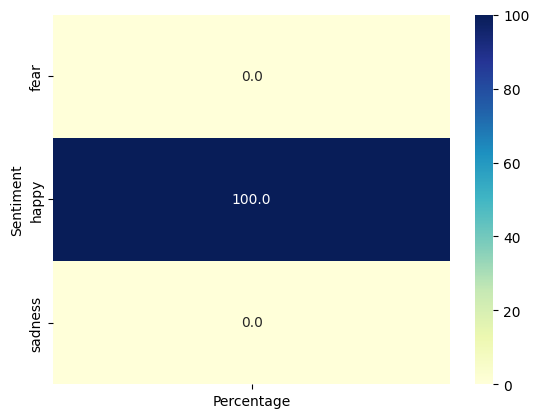

In [248]:
import seaborn as sns
import pandas as pd

# Créer une liste de sentiments et de pourcentages
sentiments = ["happy", "sadness", "fear"]  # Ajoutez les autres sentiments
percentages = [100, sadness_percentage, fear_percentage]  # Ajoutez les autres pourcentages

# Créer un DataFrame à partir des listes de sentiments et de pourcentages
data = pd.DataFrame({"Sentiment": sentiments, "Percentage": percentages})

# Créer une HeatMap à partir du DataFrame
heatmap = data.pivot_table(index="Sentiment", values="Percentage", aggfunc="first")
sns.heatmap(heatmap, cmap="YlGnBu", annot=True, fmt=".1f")

# Afficher la HeatMap
plt.show()
